In [1]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(SGD(lr=1e-1), loss='categorical_crossentropy')

W0811 20:27:56.619471  1336 deprecation_wrapper.py:119] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:47: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 20:27:56.659474  1336 deprecation_wrapper.py:119] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:349: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 20:27:56.663468  1336 deprecation_wrapper.py:119] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3145: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 20:27:56.724468  1336 deprecation_wrapper.py:119] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:675: The name tf.train.Optimizer is deprecated. Please use tf.

In [4]:
%%time
hs = model.fit(x_train, y_train, batch_size=1024, epochs=20, verbose=1)

W0811 20:28:00.931087  1336 deprecation.py:323] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 20:28:00.991087  1336 deprecation.py:506] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:519: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0811 20:28:01.015088  1336 deprecation_wrapper.py:119] From c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:762: The name tf.assign i

Epoch 1/20
60000/60000 [==============================] - 6s - loss: 1.0336     
Epoch 2/20
60000/60000 [==============================] - 6s - loss: 0.4175     
Epoch 3/20
60000/60000 [==============================] - 6s - loss: 0.3385     
Epoch 4/20
60000/60000 [==============================] - 6s - loss: 0.2995     
Epoch 5/20
60000/60000 [==============================] - 6s - loss: 0.2746     
Epoch 6/20
60000/60000 [==============================] - 6s - loss: 0.2536     
Epoch 7/20
60000/60000 [==============================] - 6s - loss: 0.2378     
Epoch 8/20
60000/60000 [==============================] - 5s - loss: 0.2229     
Epoch 9/20
60000/60000 [==============================] - 5s - loss: 0.2110     
Epoch 10/20
60000/60000 [==============================] - 6s - loss: 0.1996     
Epoch 11/20
60000/60000 [==============================] - 6s - loss: 0.1902     
Epoch 12/20
60000/60000 [==============================] - 6s - loss: 0.1813     
Epoch 13/20
60000/60000 [

In [5]:
yt = y_test.argmax(axis=1)
ypp = model.predict(x_test)
yp = ypp.argmax(axis=1)
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



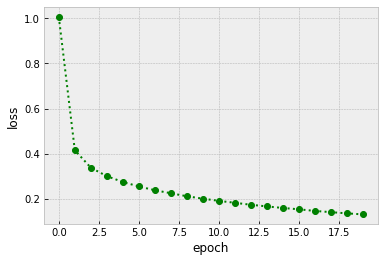

In [7]:
import pylab as plt
plt.style.use('bmh')
plt.plot(hs.history['loss'], 'go:')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()